## Imports

In [1]:
import pandas as pd
from cred_helper import set_aws_credentials, txt2dict
from s3_helper import S3Helper
from loguru import logger

### Set credentials as environment variables

In [2]:
set_aws_credentials(txt2dict('./config/local/aws_credentials.txt'))

### Get df with class S3Helper

In [3]:
s3h = S3Helper()
s3h.client()
df = s3h.load_df(bucket_name='ds-main-s3-200624937306-dataset', file_key='ds-mtc-dialdig/call_center_dia_tudo.xlsx', type='excel')

2023-06-01 09:42:28.238 | SUCCESS  | s3_helper.s3_helper:load_s3:23 - Função realizada com sucesso
/home/thiago/.conda/envs/le/lib/python3.10/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
2023-06-01 09:42:28.542 | SUCCESS  | s3_helper.s3_helper:data2df:51 - Sucesso. Dataframe contém 398 linhas


### preprocessing

In [11]:
def rename_cols(df):
    key_mapping = {key: key.lower().replace(' ', '_').replace('%','porc_').replace('.','').replace('__','_') for key in df.columns}
    df.rename(columns=key_mapping, inplace=True)

In [12]:
def dropna_cols(df, porc = 0.3):
    nans = df.isna().sum()/df.shape[0]
    for i in nans.index:
        if nans[i] > porc:
            df.drop(i, axis=1, inplace=True)
            logger.info('Coluna {} removida por ter mais de {}% de valores nulos'.format(i, porc*100))

In [13]:
rename_cols(df)
df = df.dropna()
df = df.iloc[:-1,:]
df['data'] = pd.to_datetime(df['data'], format='%Y-%m-%d %H:%M:%S')
df.isna().sum()

data                      0
cham_forecast             0
cham_recebidas            0
cham_atendidas            0
cham_ativas               0
chat                      0
total_contatos            0
tma_ativo                 0
porc_fcr21                0
cham_abandonadas          0
porc_abandono             0
porc_nível_de_serviço_    0
tma                       0
tme                       0
t_médio_abandono          0
porc_nss                  0
porc_pesq_respondidas     0
atendidas_ns              0
dtype: int64

### Exploratory analysis

In [57]:
df = df.sort_values(by='data')
X = df.drop(['data'], axis=1)

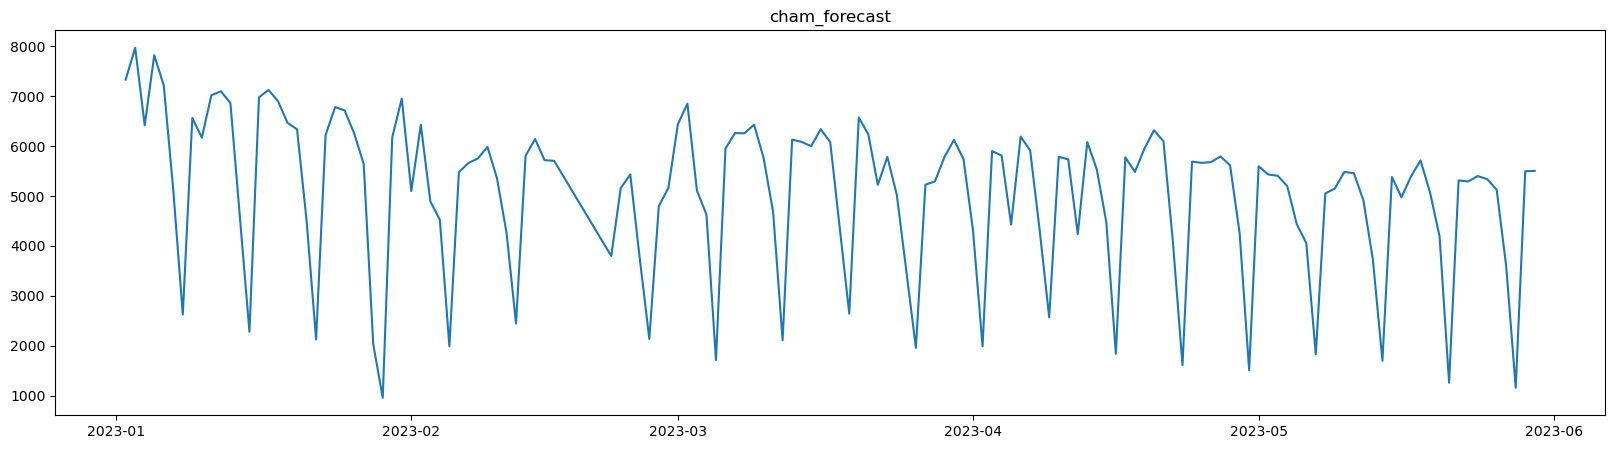

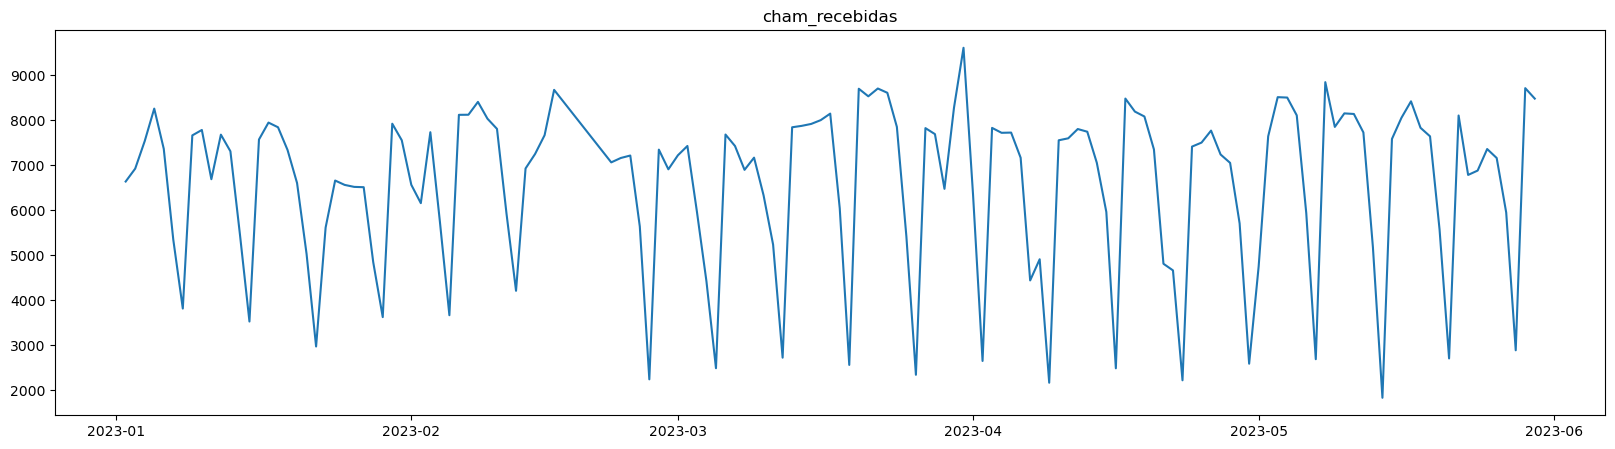

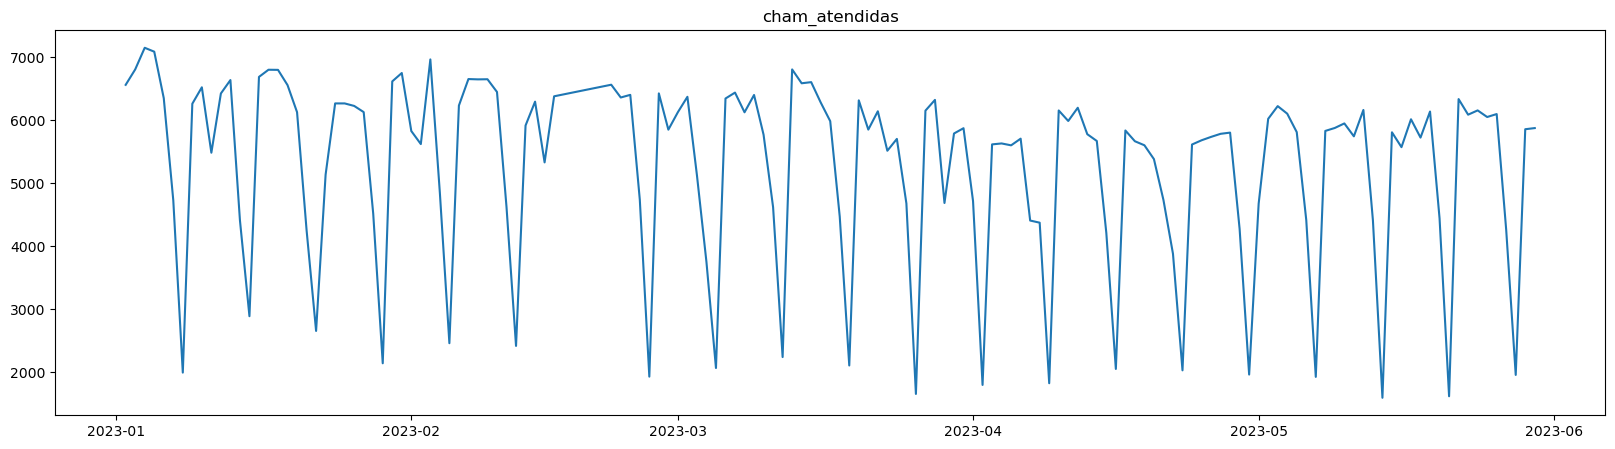

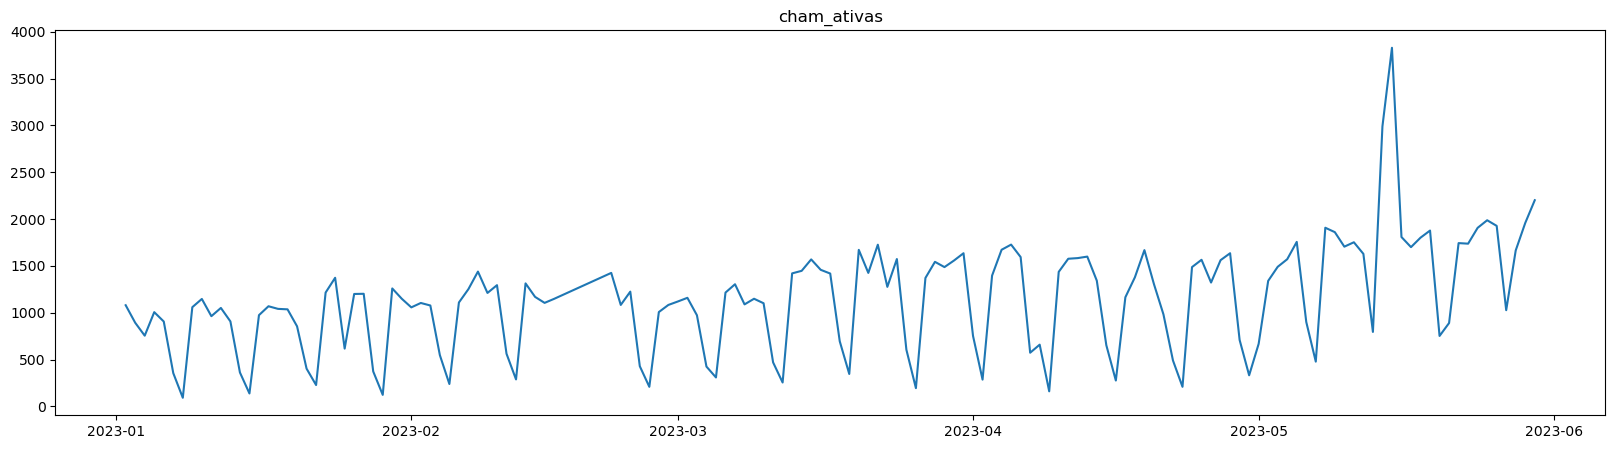

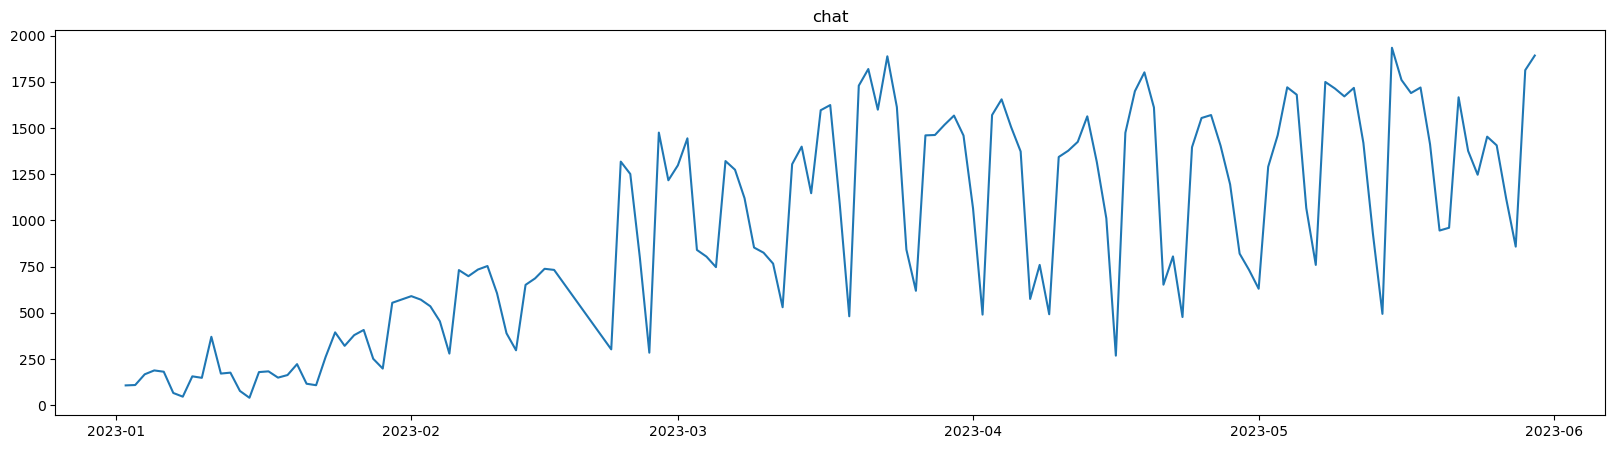

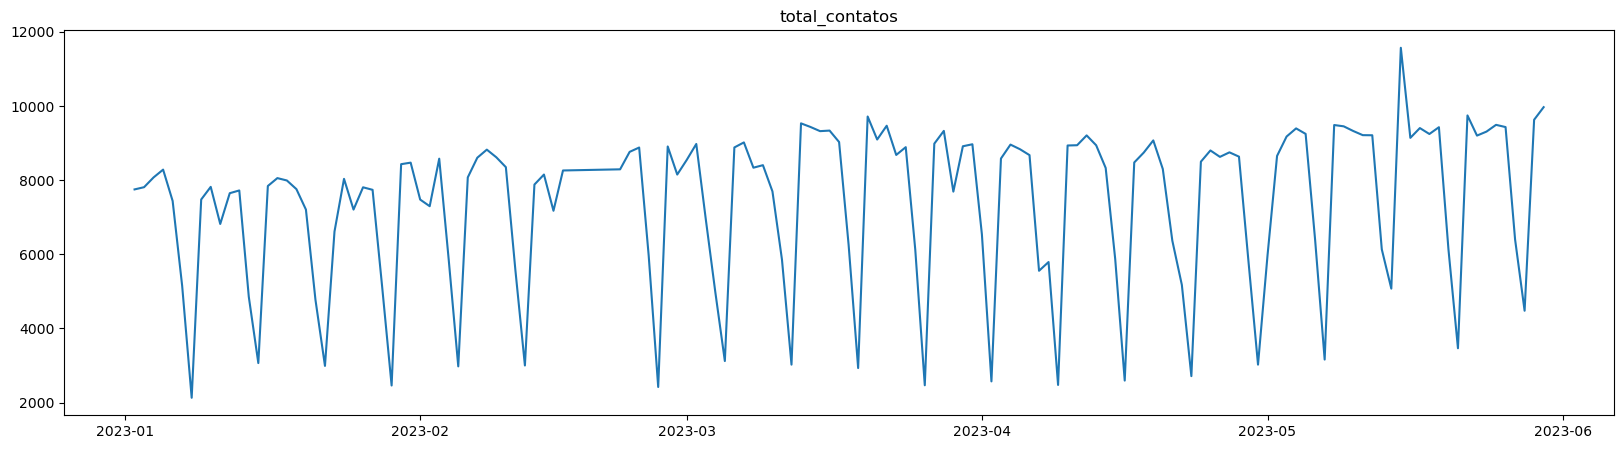

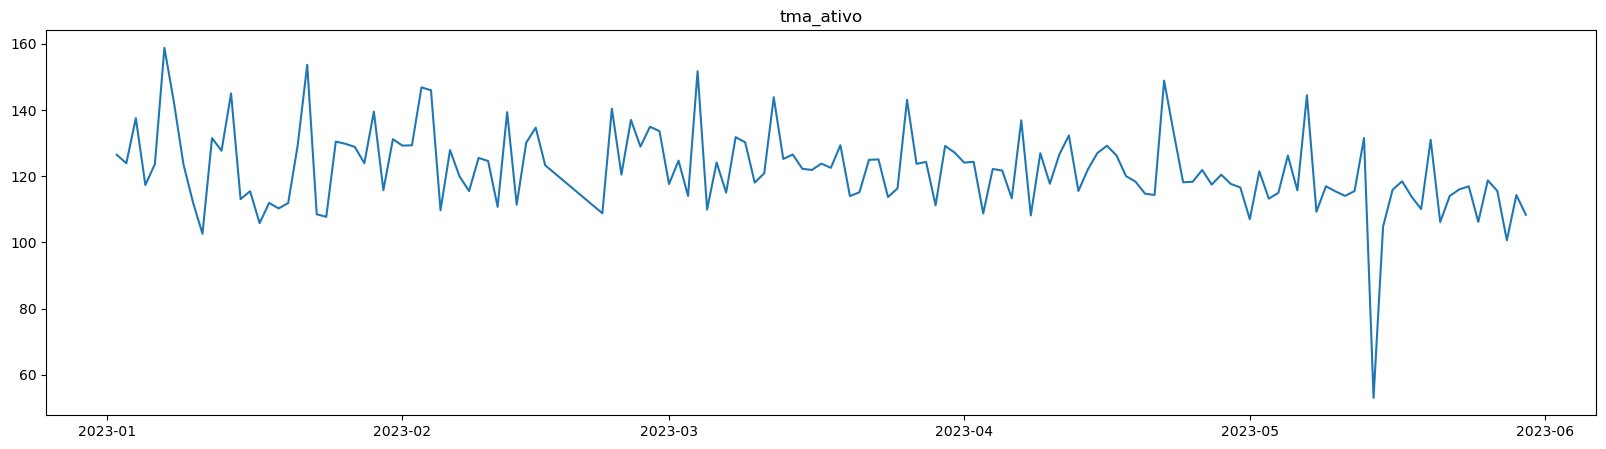

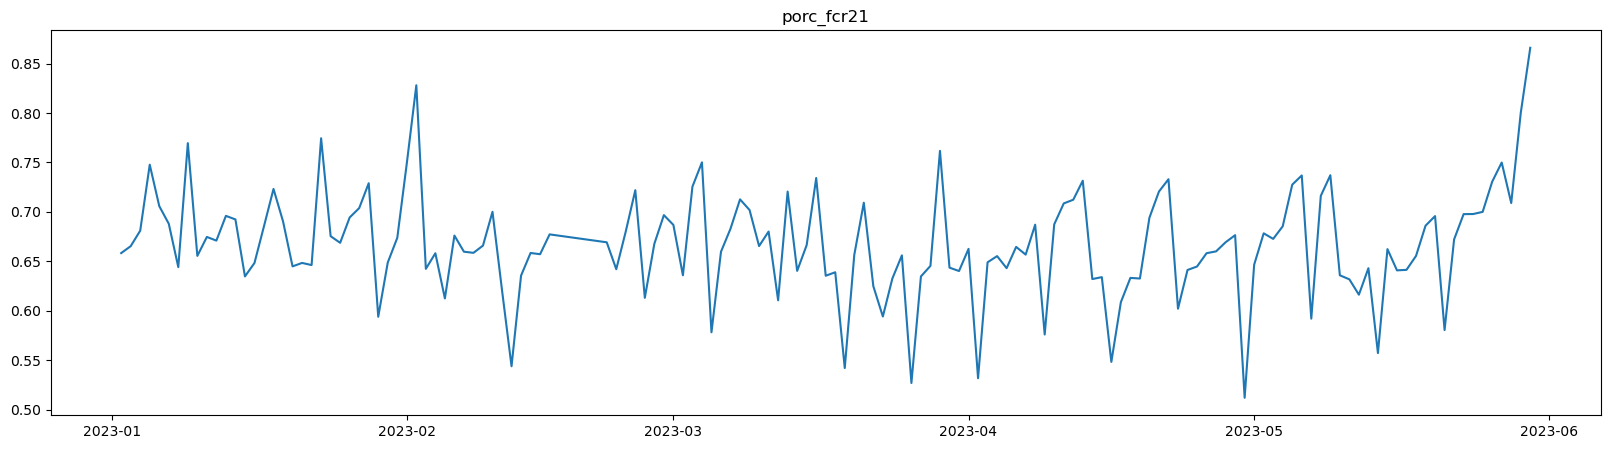

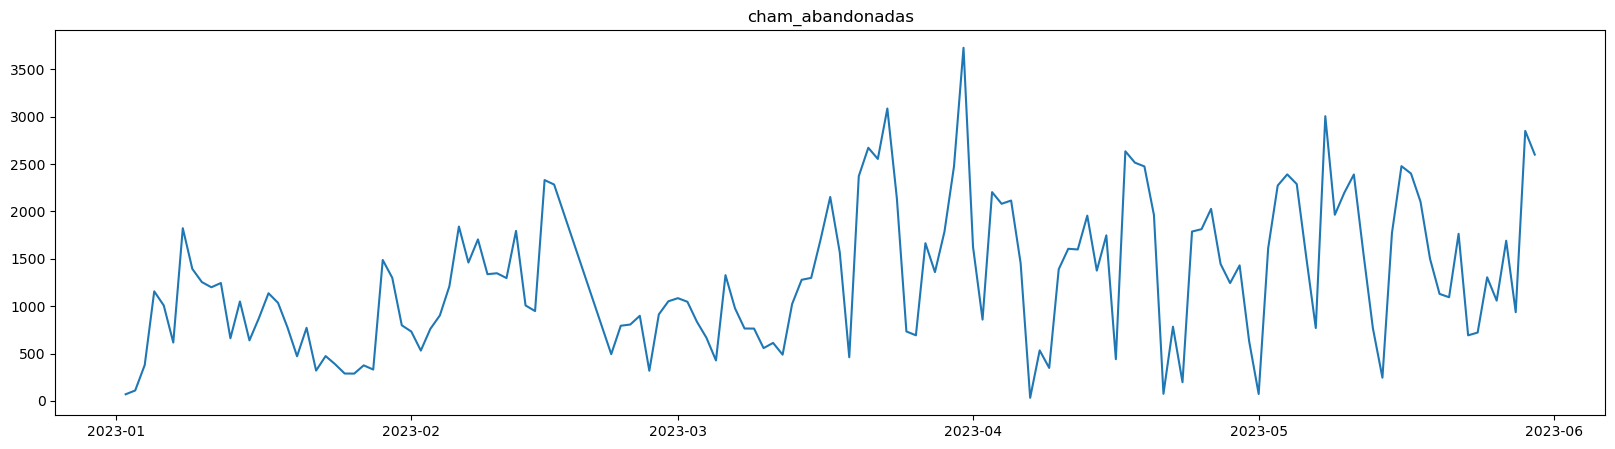

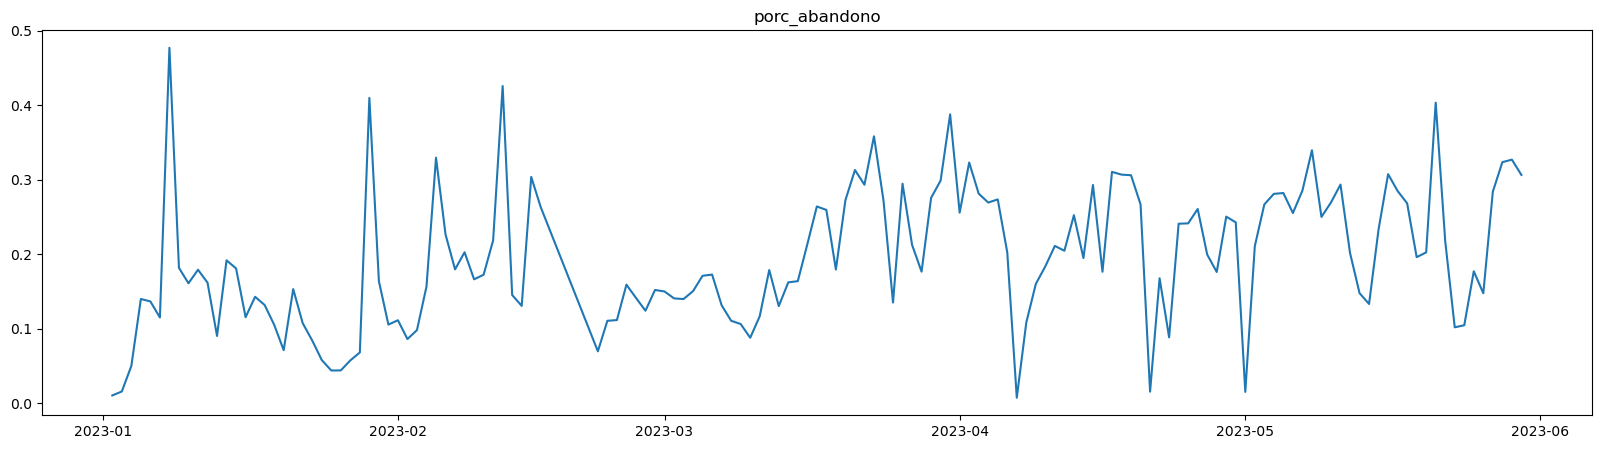

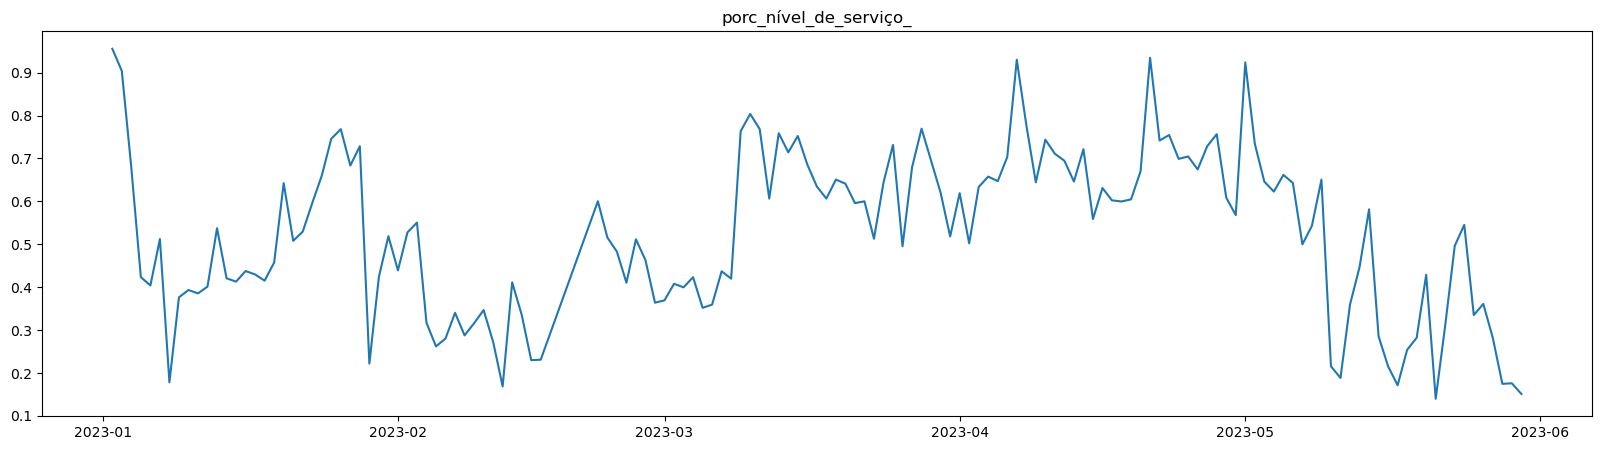

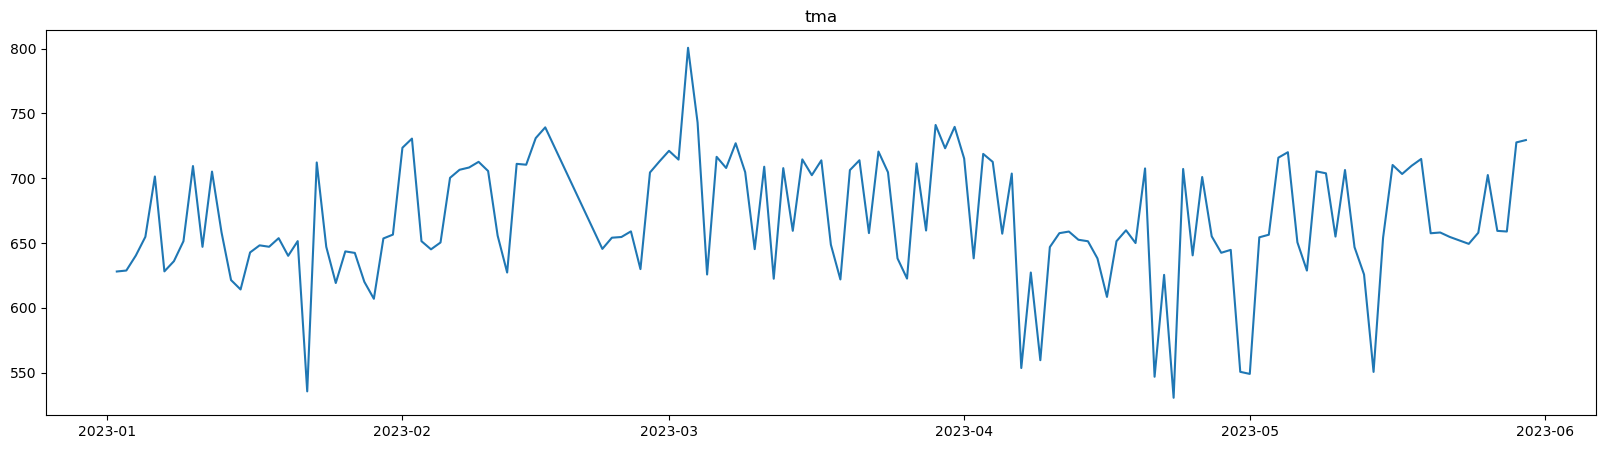

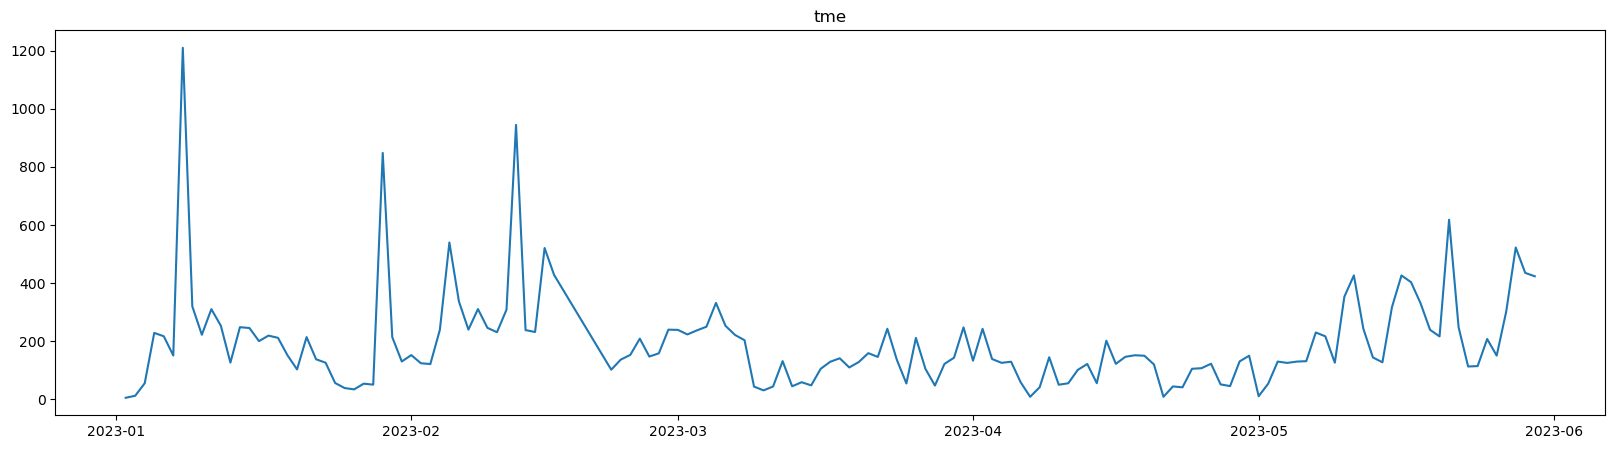

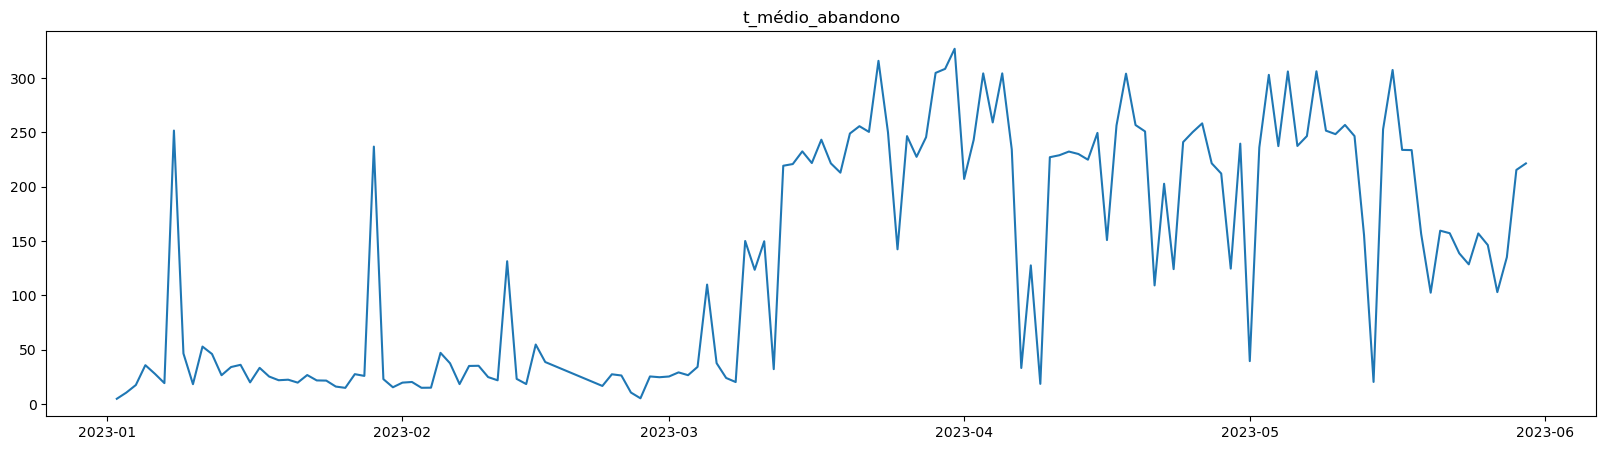

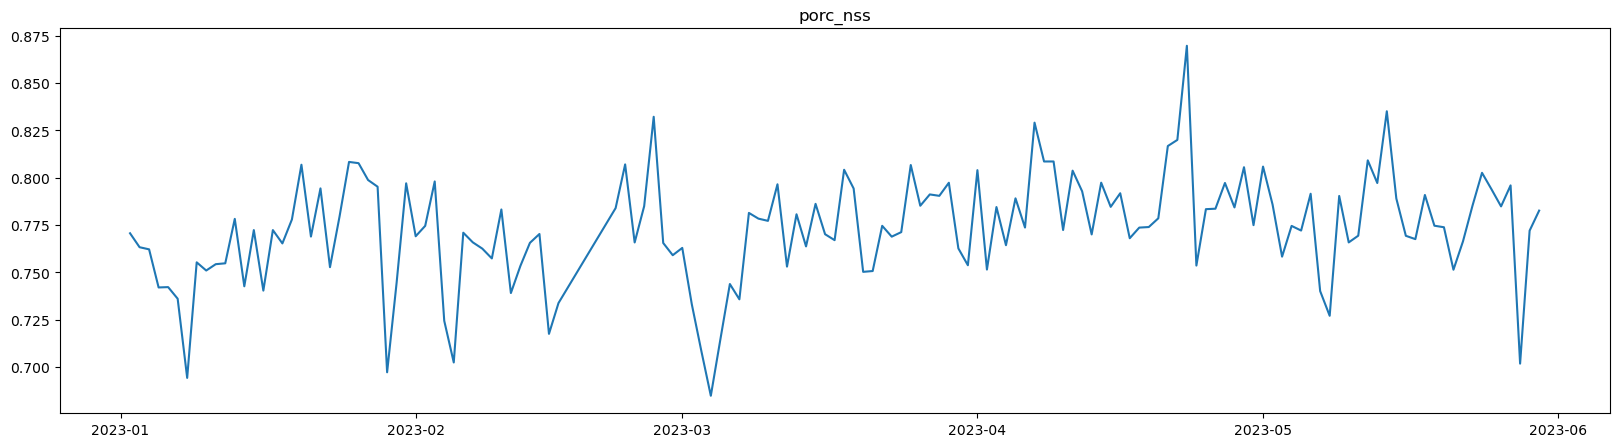

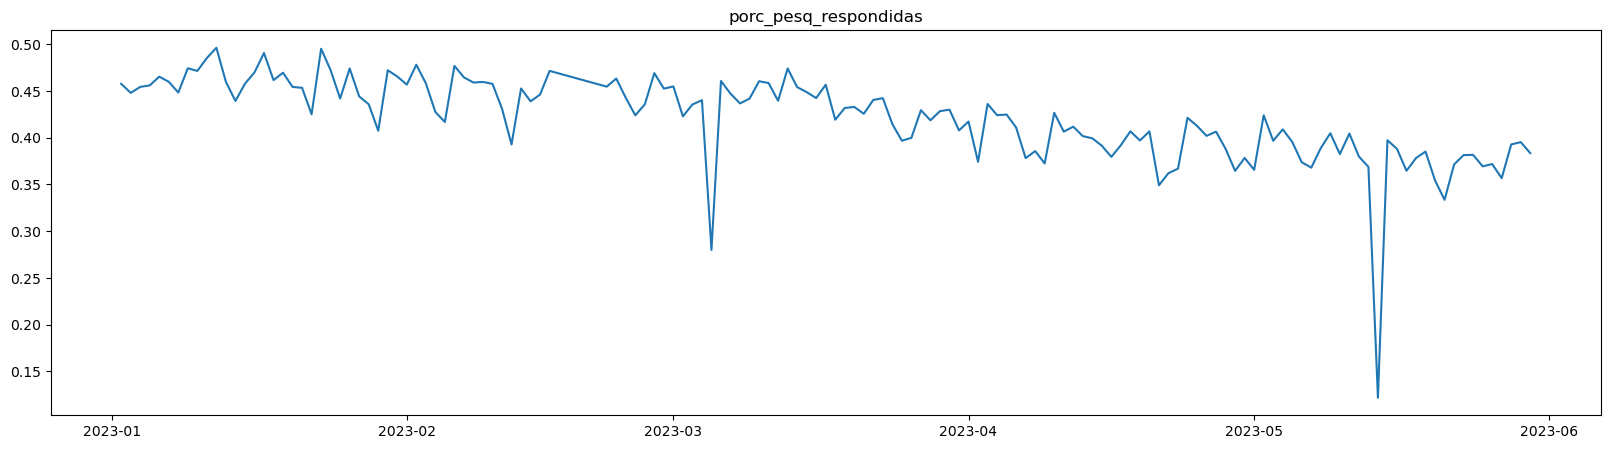

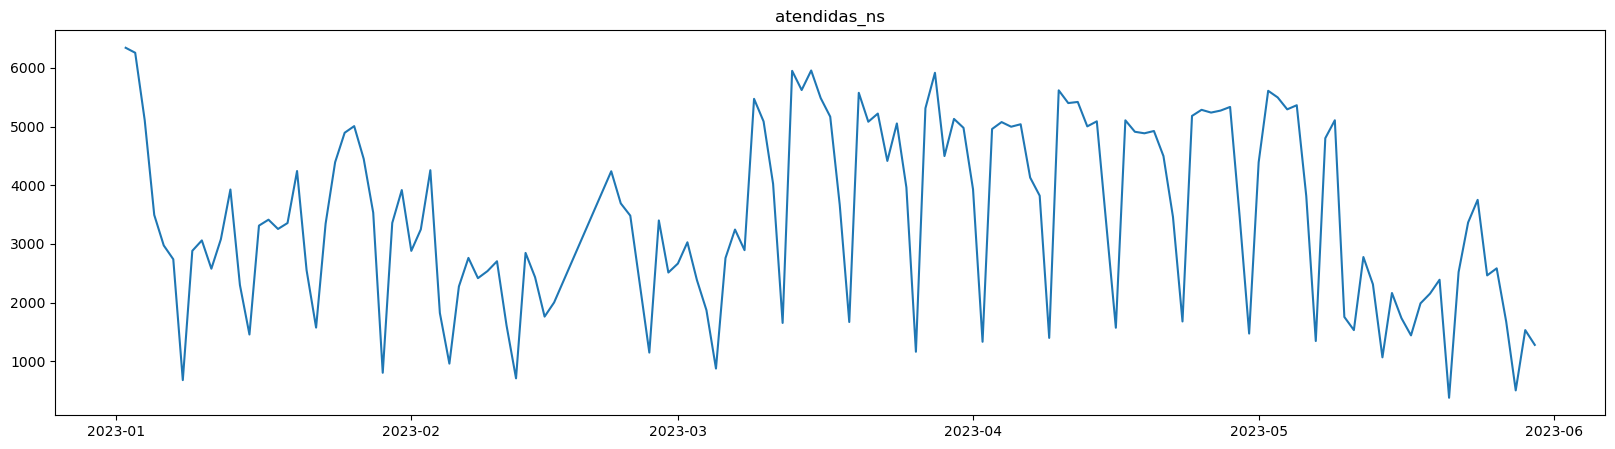

In [60]:
for n,col in enumerate(X.columns):
    fig = plt.figure(figsize=(20,5))
    #plt.subplot(1,n,df[col])
    plt.plot(df.data.values, X[col].values)
    plt.title(col)


In [61]:
df['dia_sem'] = df['data'].dt.dayofweek

In [64]:
dfs = df.groupby('dia_sem').mean()

/tmp/ipykernel_12612/2787039708.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfs = df.groupby('dia_sem').mean()


,cham_forecast,cham_recebidas,cham_atendidas,cham_ativas,chat,total_contatos,tma_ativo,porc_fcr21,cham_abandonadas,porc_abandono,porc_nível_de_serviço_,tma,tme,t_médio_abandono,porc_nss,porc_pesq_respondidas,atendidas_ns
dia_sem,,,,,,,,,,,,,,,,,
0,5868.761905,7574.619048,6058.571429,1441.952381,1119.190476,8619.714286,117.692327,0.677776,1510.857143,0.190111,0.538147,679.094122,181.235442,139.765852,0.765258,0.436154,3982.428571
1,5947.428571,7639.666667,6170.952381,1428.142857,1156.095238,8755.190476,119.590561,0.681404,1465.904762,0.187513,0.542059,680.078105,163.245515,147.809925,0.773192,0.432428,4113.476190
2,5672.000000,7563.428571,6061.000000,1356.857143,1067.666667,8485.523810,120.810028,0.677501,1497.428571,0.193347,0.515083,678.801431,189.121096,144.591586,0.774242,0.429988,3873.809524
3,6121.904762,7646.380952,6094.619048,1362.333333,1151.571429,8608.523810,121.368144,0.683282,1546.714286,0.197128,0.513293,693.716551,181.423863,146.992944,0.772205,0.434973,3879.095238
4,5608.550000,7120.000000,5919.100000,1294.300000,969.700000,8183.100000,122.260047,0.675545,1198.250000,0.155696,0.582741,671.822852,133.749412,128.762573,0.780943,0.420208,4031.750000
5,4144.700000,5466.700000,4431.450000,598.200000,708.600000,5738.250000,129.100153,0.685093,1033.100000,0.184631,0.540312,653.193676,163.161711,110.220294,0.778226,0.408000,2930.300000
6,1921.400000,2823.600000,2064.200000,485.400000,457.900000,3007.500000,124.382046,0.587730,758.750000,0.251809,0.444264,608.823863,353.037617,133.726832,0.765898,0.381128,1172.750000


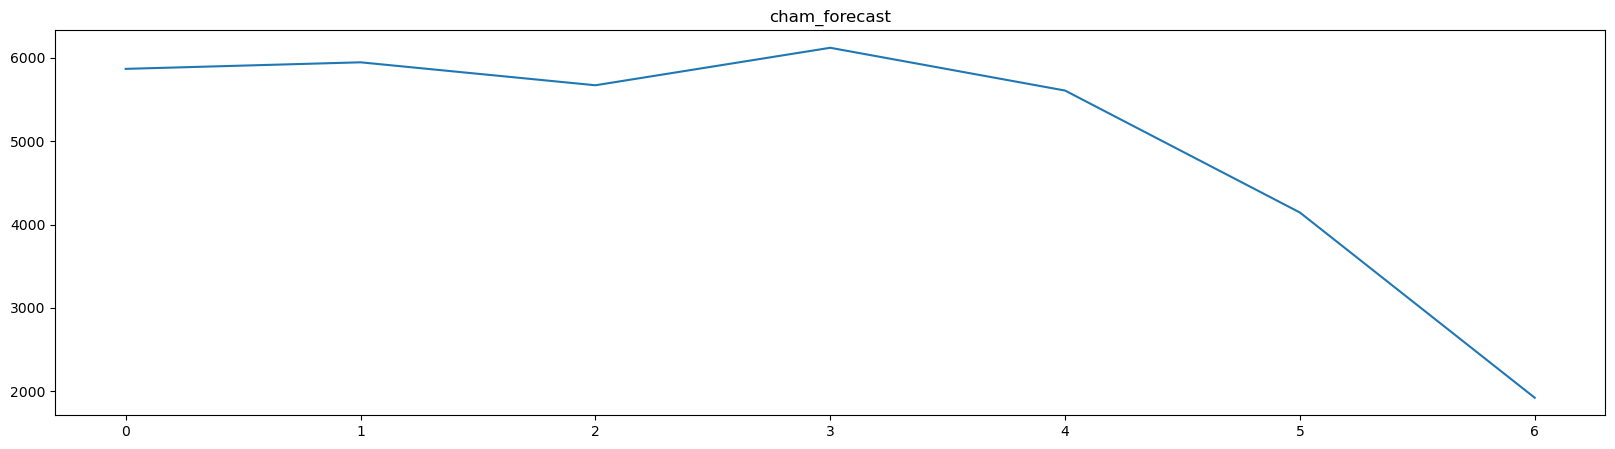

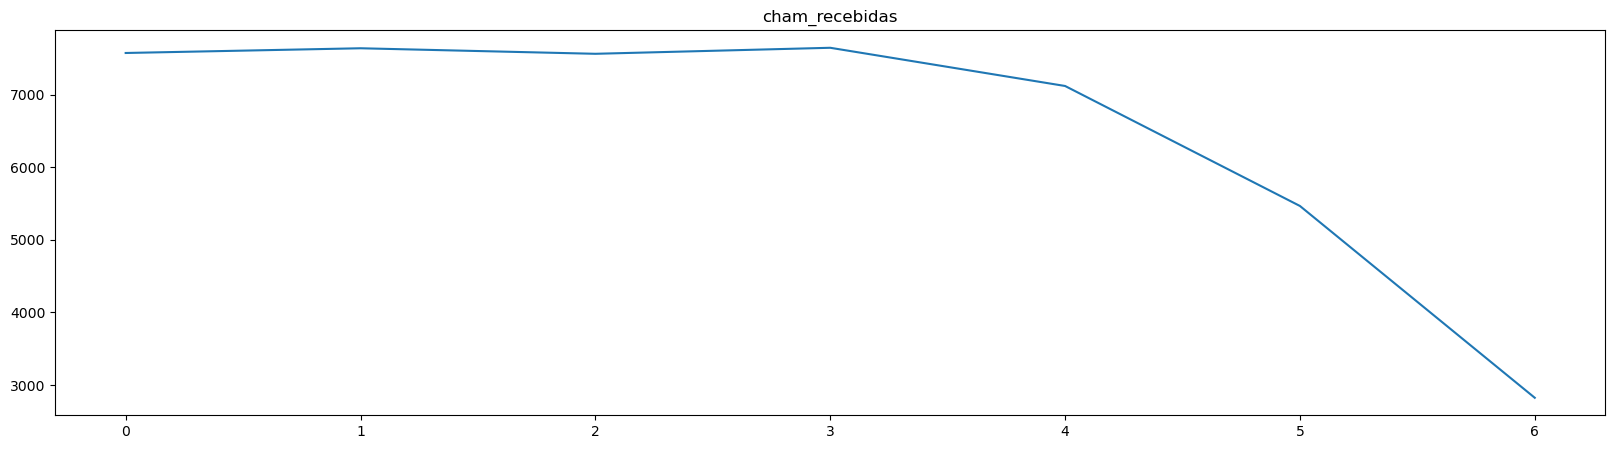

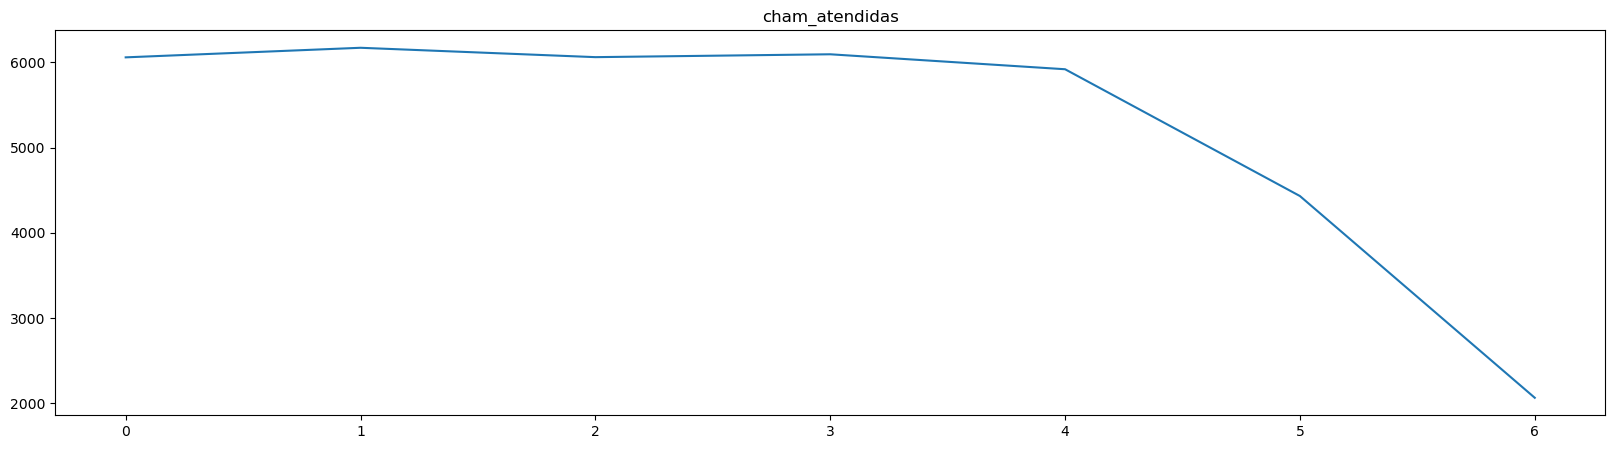

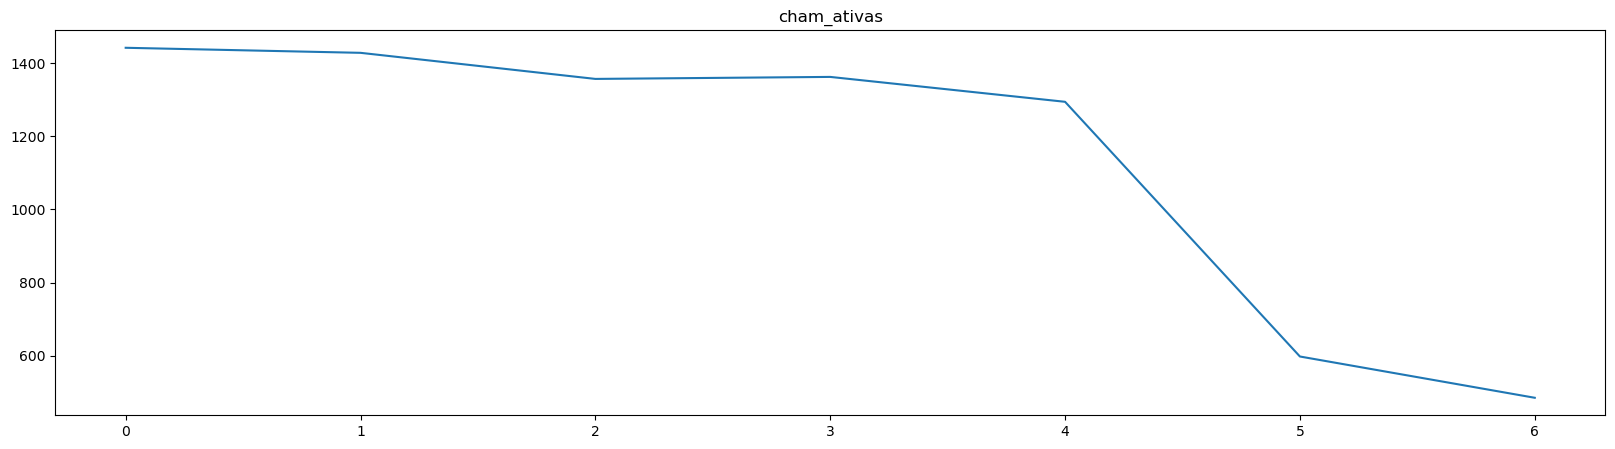

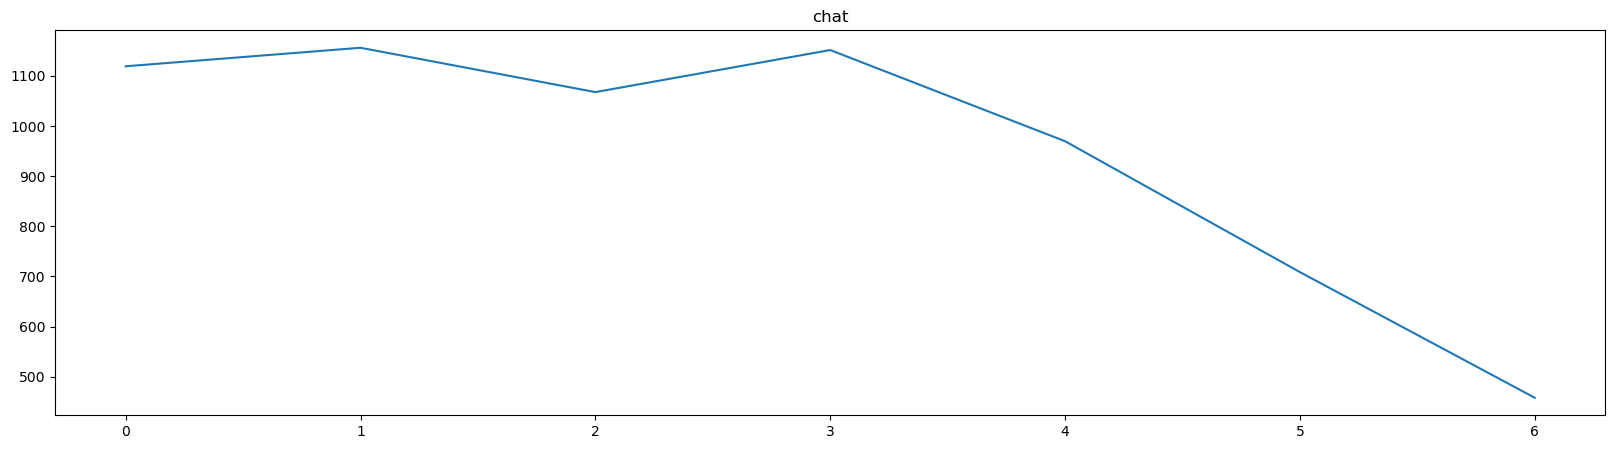

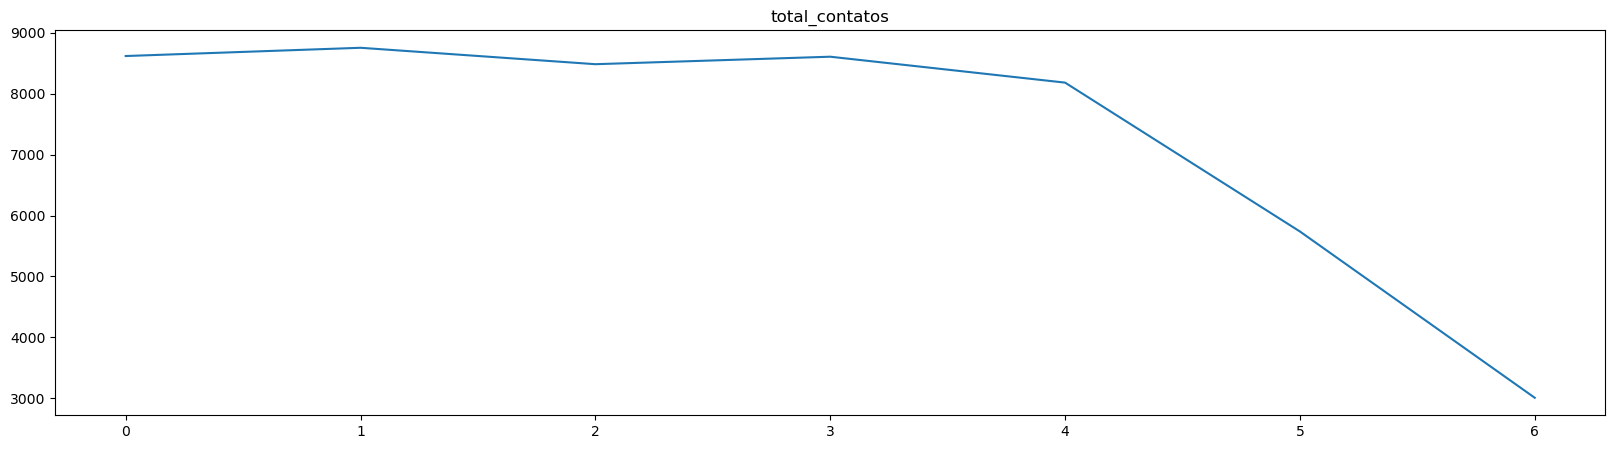

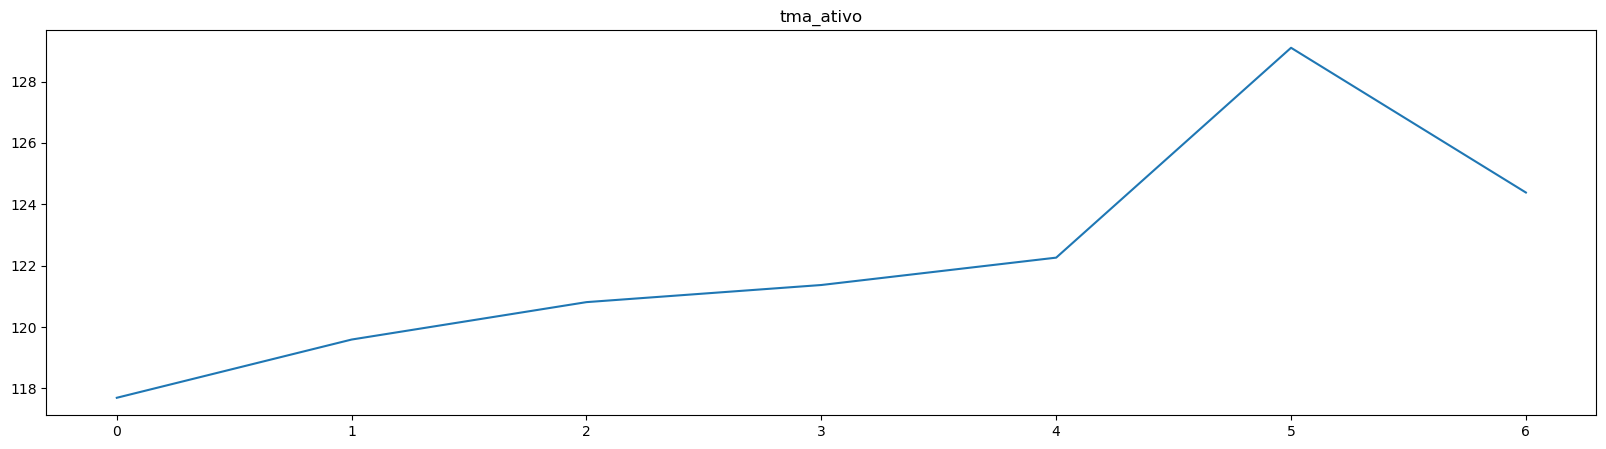

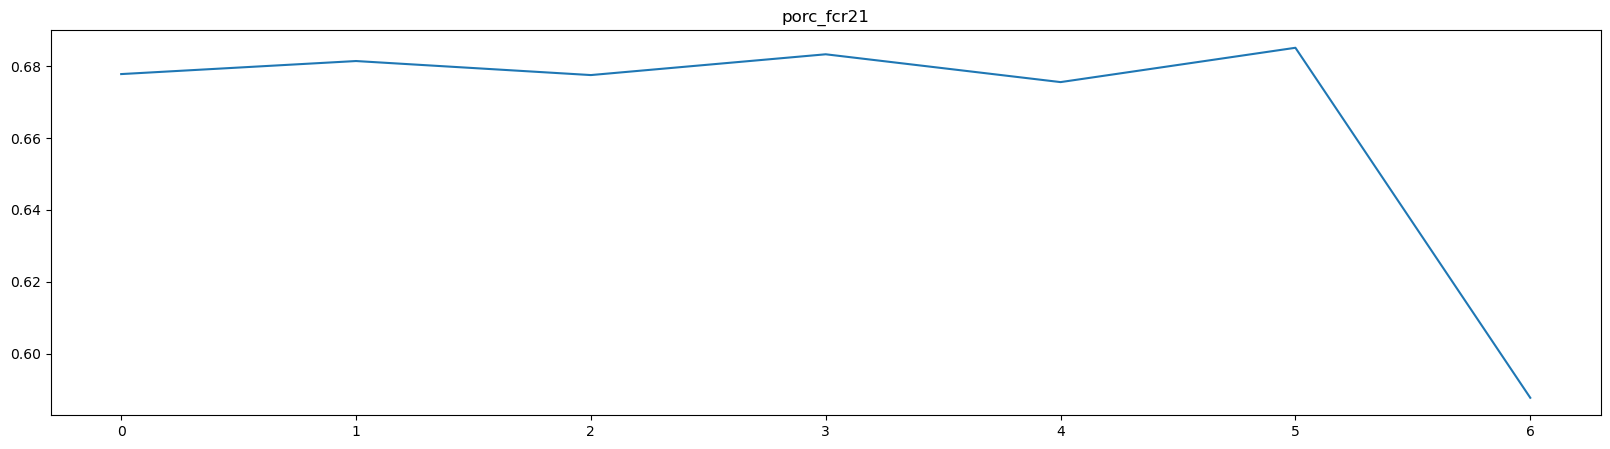

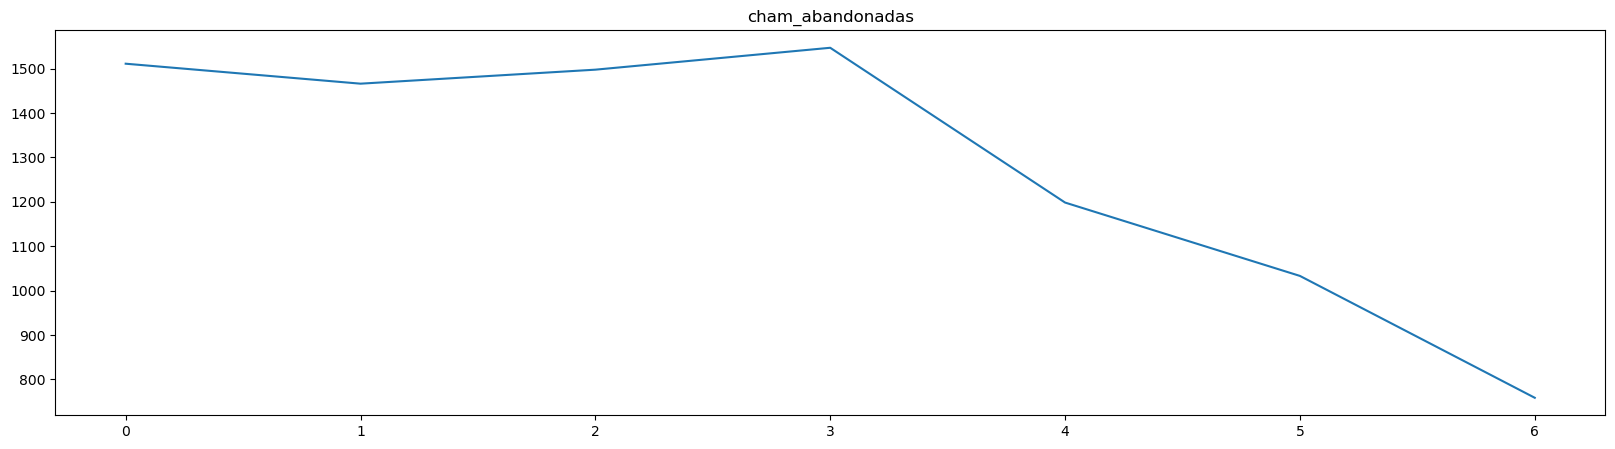

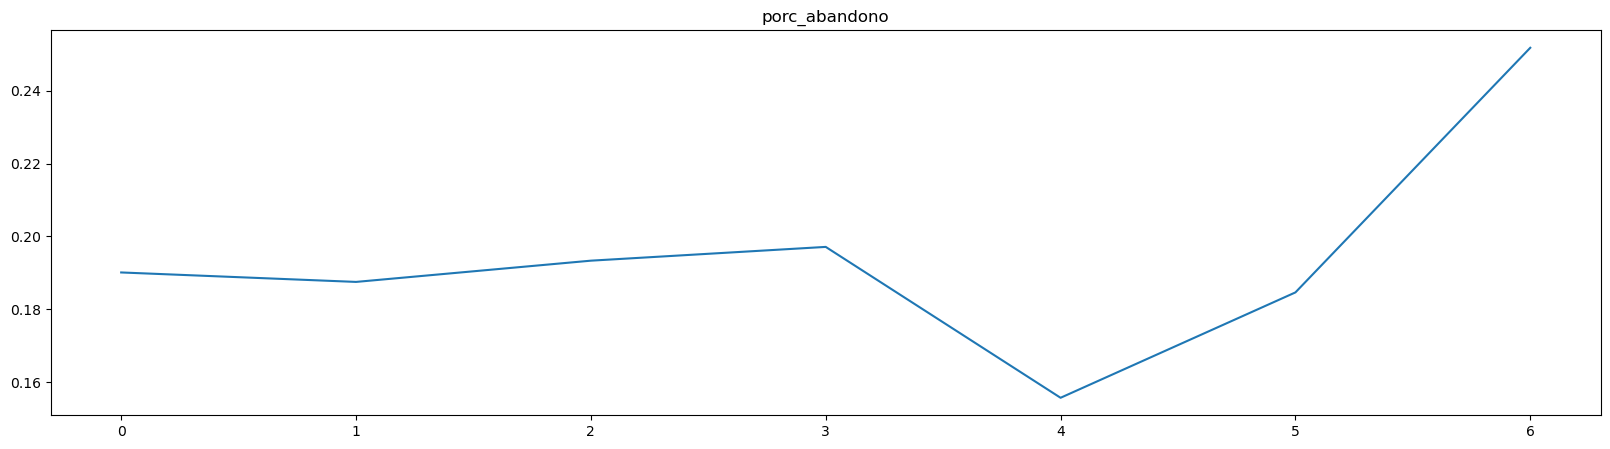

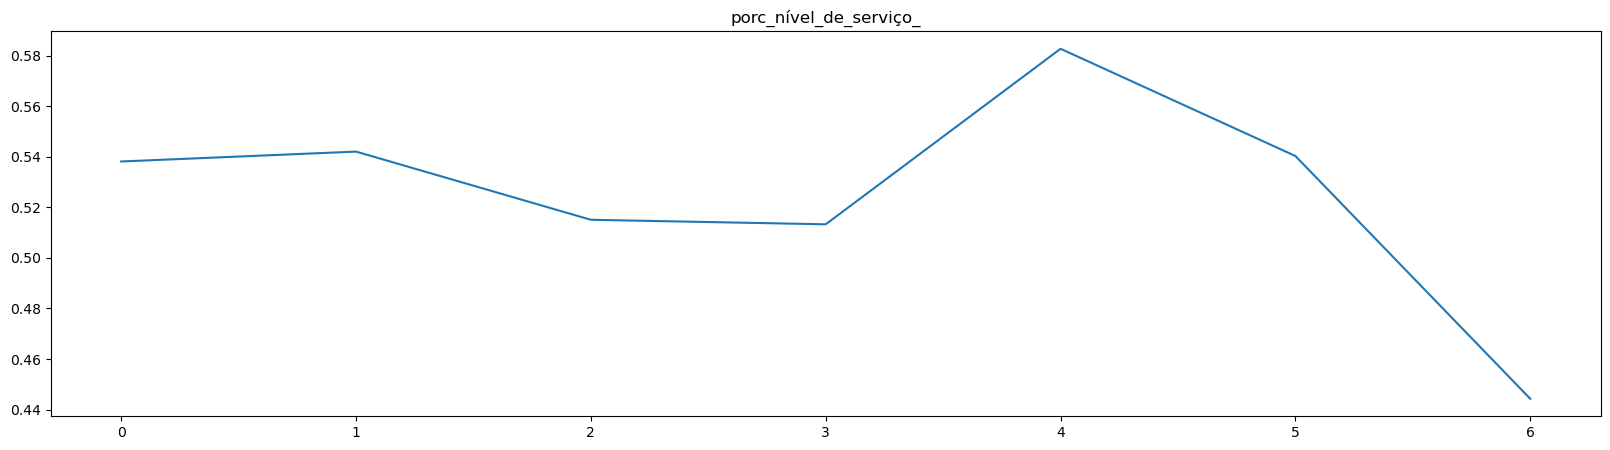

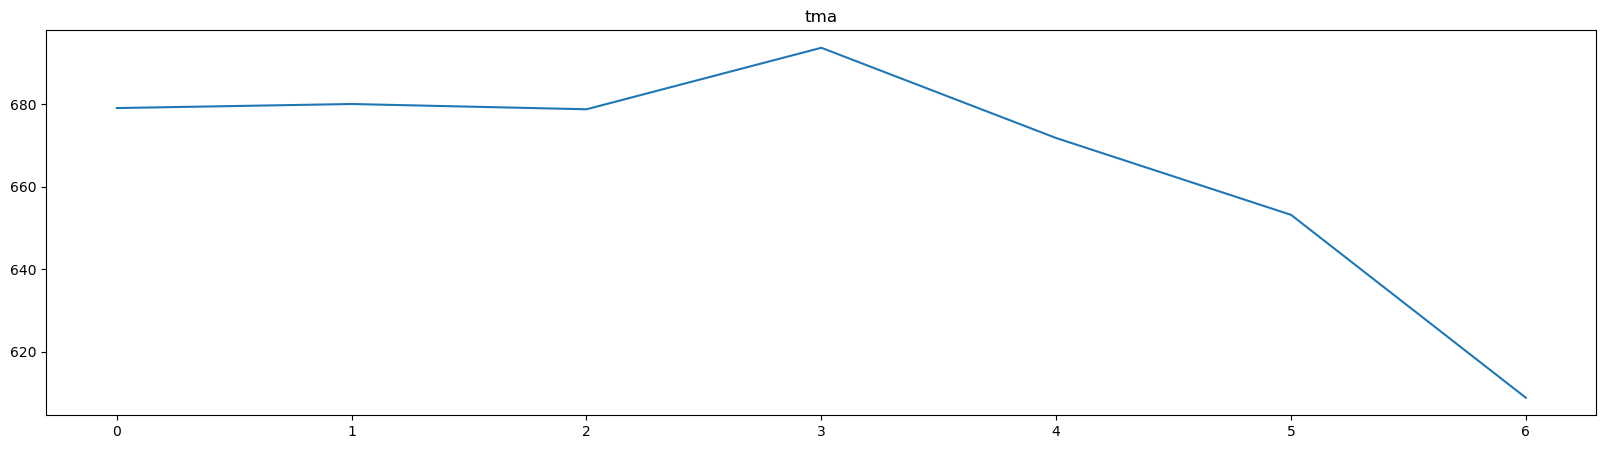

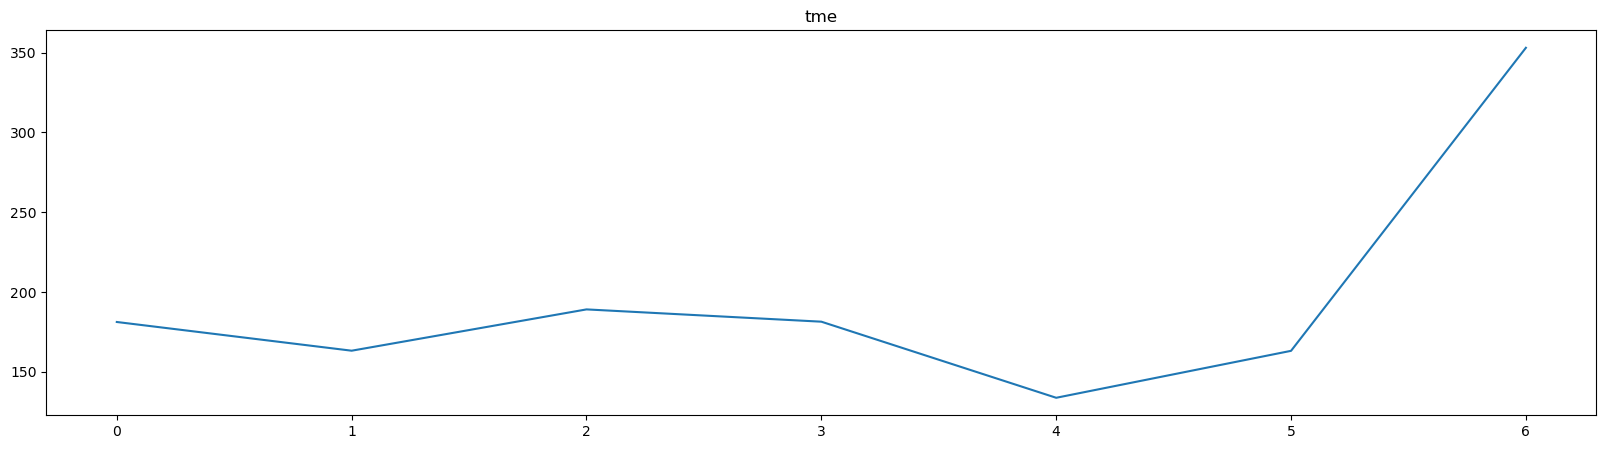

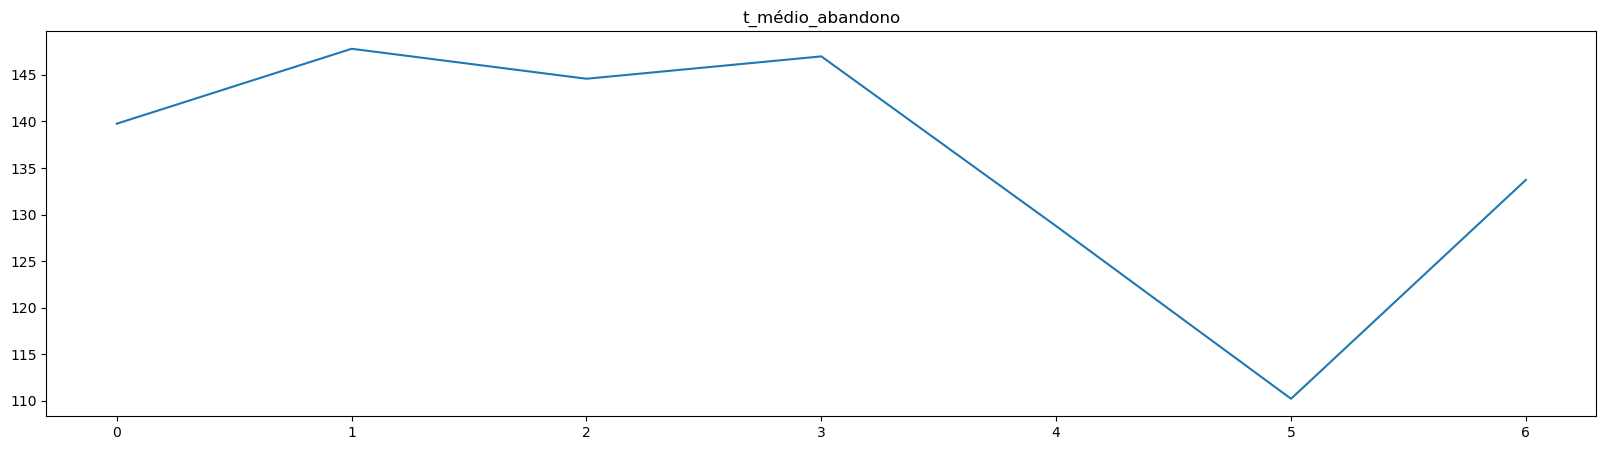

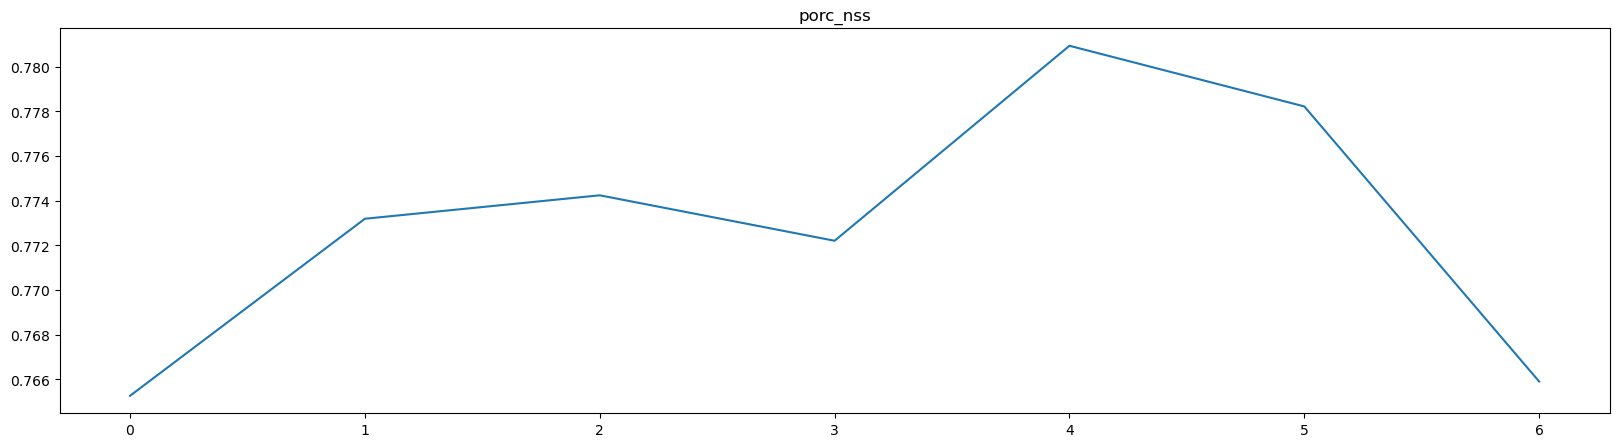

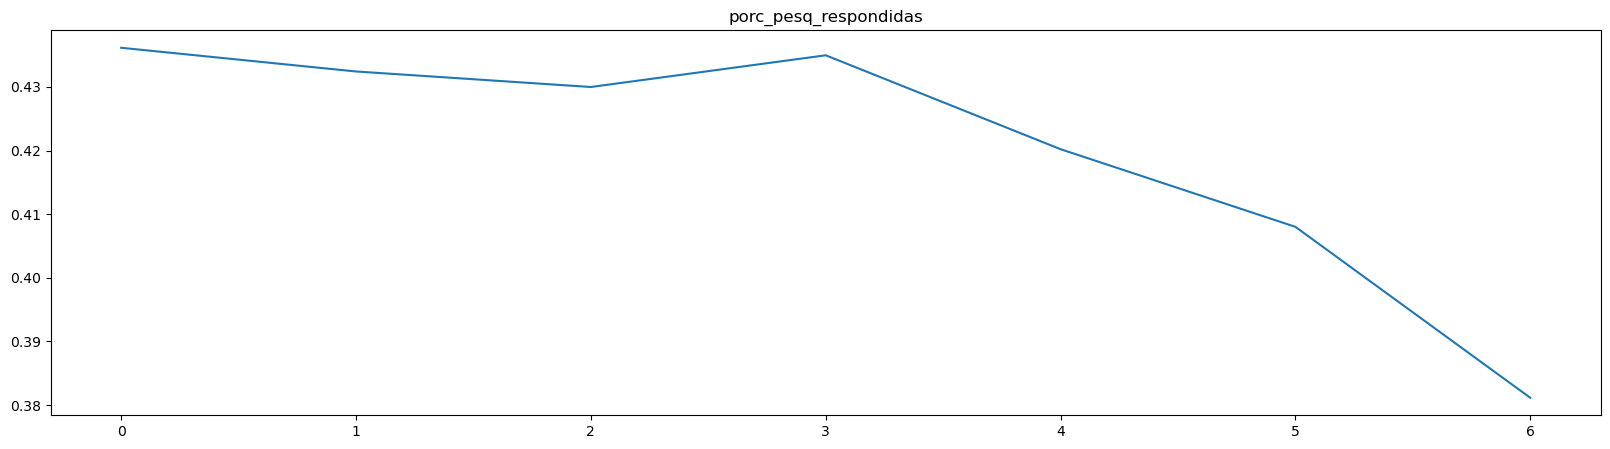

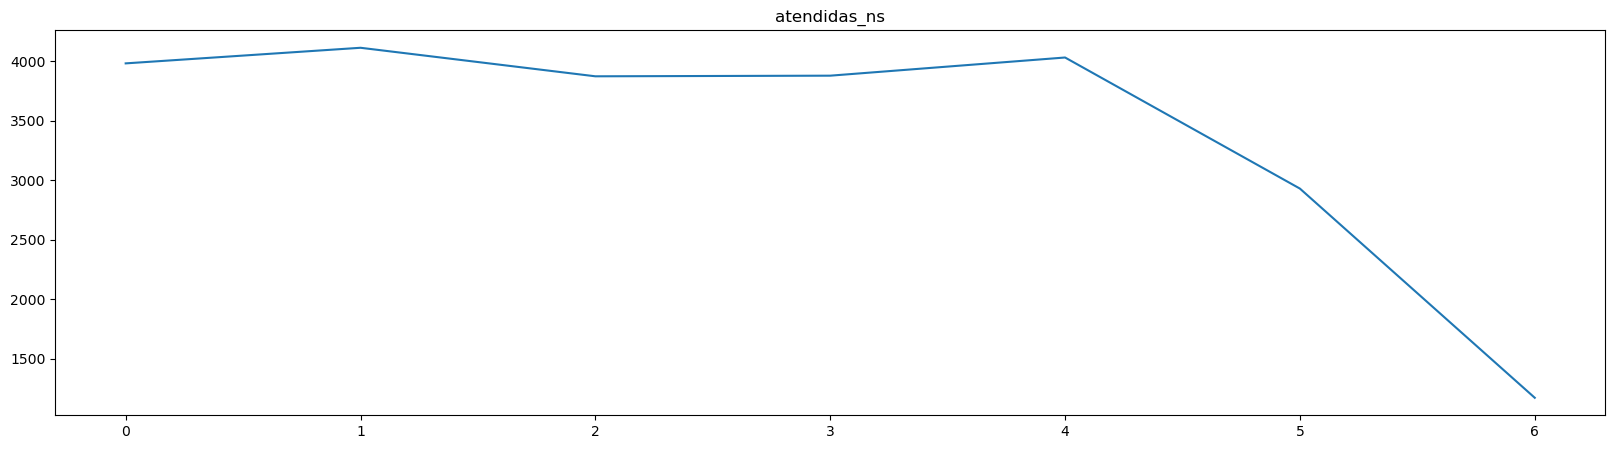

In [68]:
for n,col in enumerate(dfs.columns):
    fig = plt.figure(figsize=(20,5))
    #plt.subplot(1,n,df[col])
    plt.plot(dfs.index, dfs[col].values)
    plt.title(col)